In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# 数据来自 AMPds的聚合数据
data = pd.read_csv("./WHE.csv",encoding='utf-8')

In [4]:
data

,TS,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
0,1333263600,231.9,60.7,60.00,1.0,0.99,7052,0,711,0,7063,0
1,1333263660,231.8,60.4,60.00,1.0,0.99,7028,117,671,12,7031,118
2,1333263720,231.8,60.4,60.00,1.0,1.00,7023,117,649,11,7026,116
3,1333263780,232.3,44.7,60.00,1.0,1.00,5218,88,300,5,5194,88
4,1333263840,232.8,44.7,60.00,1.0,1.00,5231,88,300,5,5214,88
...,...,...,...,...,...,...,...,...,...,...,...,...
524538,1364799300,238.5,30.6,60.00,1.0,1.00,3686,65,178,3,3647,62
524539,1364799360,238.4,30.6,60.00,1.0,0.99,3676,47,187,4,3654,48
524540,1364799420,238.9,7.2,60.12,1.0,0.90,811,34,203,3,866,32
524541,1364799480,239.7,7.2,60.00,1.0,0.89,806,11,205,3,868,16


C:\ProgramData\Anaconda3\envs\zhengqi_predict\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V', ylabel='Density'>

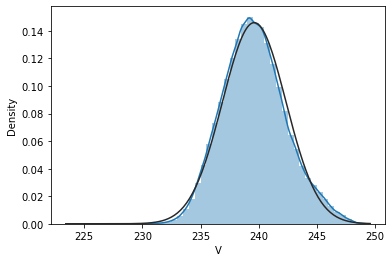

In [6]:
# 电压数据的kde

sns.distplot(data['V'],fit=stats.norm)

C:\ProgramData\Anaconda3\envs\zhengqi_predict\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


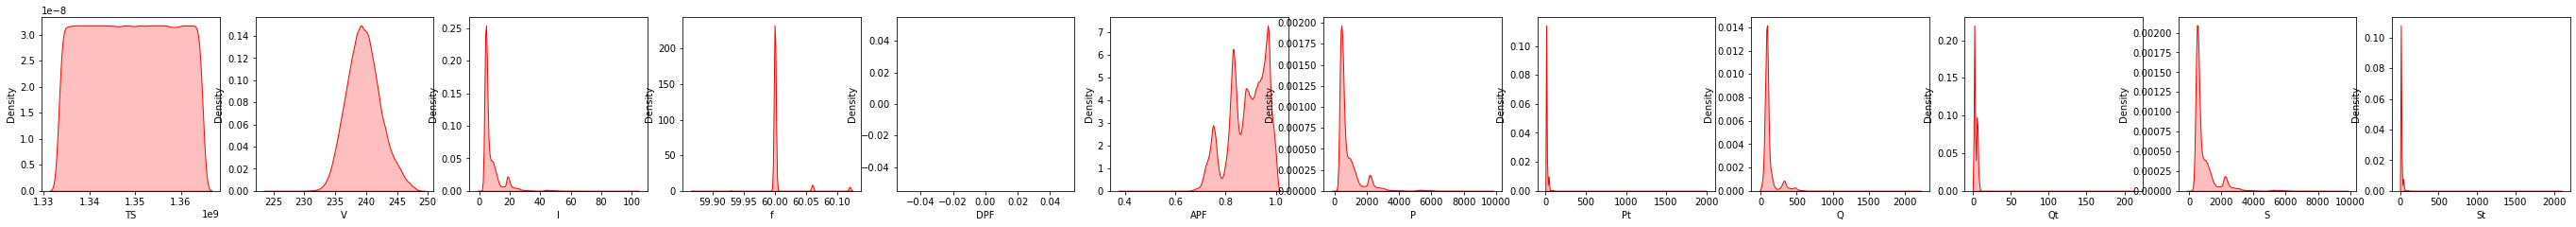

In [9]:
# 看一下数据kde分布
dist_cols=12
dist_rows=len(data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i=1
for col in data.columns:
    ax = plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(data[col],color='Red',shade=True)
    i+=1

C:\ProgramData\Anaconda3\envs\zhengqi_predict\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P', ylabel='Density'>

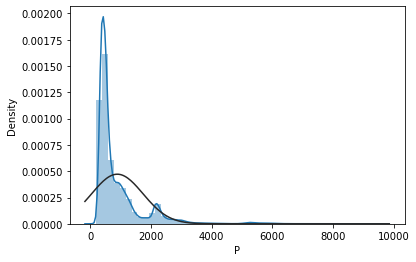

In [10]:
# 功率数据的kde

sns.distplot(data['P'],fit=stats.norm)

Text(0.5, 1.0, 'AMPds whole aggregating power')

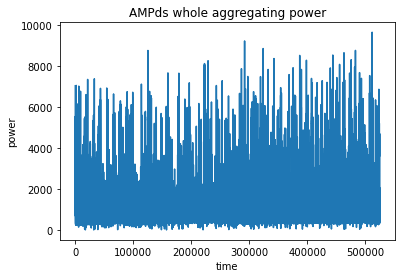

In [14]:
plt.plot(data['P'])
plt.xlabel('time')
plt.ylabel('power')
plt.title('AMPds whole aggregating power')

Text(0.5, 1.0, 'AMPds whole aggregating current')

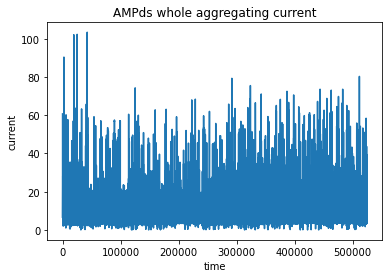

In [16]:
plt.plot(data['I'])
plt.xlabel('time')
plt.ylabel('current')
plt.title('AMPds whole aggregating current')

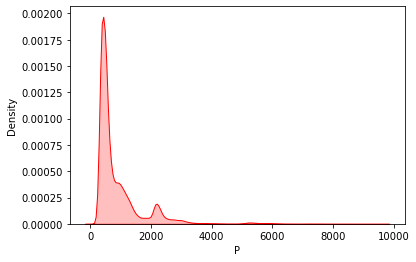

In [20]:
# kde直方图的方式呈现
ax=sns.kdeplot(data['P'],color='Red',shade=True)
# ax=sns.kdeplot(data['I'],color='Blue',shade=True)


<AxesSubplot:xlabel='I', ylabel='P'>

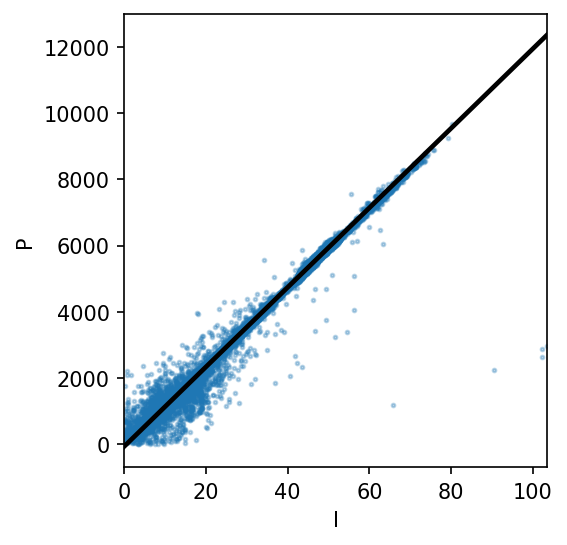

In [24]:
# 功率居然可以跟电流线性拟合
plt.figure(figsize=(8,4),dpi=150)
ax = plt.subplot(1,2,1)
sns.regplot(x='I',y='P',data=data,ax=ax,
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'}    
    )

In [29]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data22=data.drop(['DPF'],axis=1)
data11=data22.corr()
data11

,TS,V,I,f,APF,...,Pt,Q,Qt,S,St
TS,1.000000,0.200507,0.142443,0.009323,0.134380,...,0.145884,0.116455,0.111311,0.146581,0.146120
V,0.200507,1.000000,-0.230742,0.000063,-0.271811,...,-0.218368,-0.126779,-0.115849,-0.219435,-0.211598
I,0.142443,-0.230742,1.000000,0.020141,0.570996,...,0.943419,0.804530,0.745352,0.997465,0.940567
f,0.009323,0.000063,0.020141,1.000000,0.039871,...,0.020484,0.008145,0.007315,0.020417,0.019797
APF,0.134380,-0.271811,0.570996,0.039871,1.000000,...,0.568940,0.365874,0.343262,0.567340,0.545021
...,...,...,...,...,...,...,...,...,...,...,...
Pt,0.145884,-0.218368,0.943419,0.020484,0.568940,...,1.000000,0.772307,0.781322,0.944844,0.996558
Q,0.116455,-0.126779,0.804530,0.008145,0.365874,...,0.772307,1.000000,0.895153,0.807239,0.777510
Qt,0.111311,-0.115849,0.745352,0.007315,0.343262,...,0.781322,0.895153,1.000000,0.748149,0.789762
S,0.146581,-0.219435,0.997465,0.020417,0.567340,...,0.944844,0.807239,0.748149,1.000000,0.942088


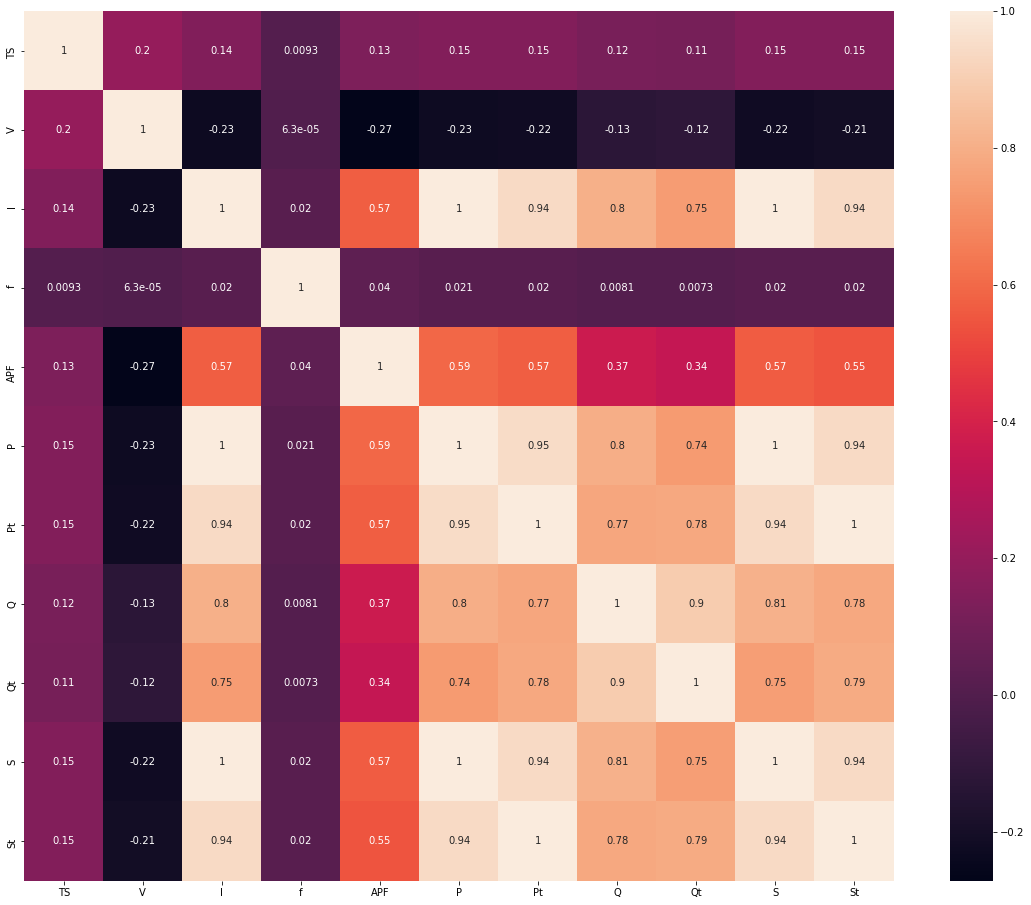

In [30]:
ax = plt.figure(figsize= (20,16))
ax=sns.heatmap(data11,vmax=1,square=True,annot=True)

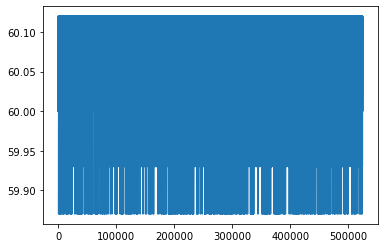

In [32]:
plt.plot(data['f'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524543 entries, 0 to 524542
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TS      524543 non-null  int64  
 1   V       524543 non-null  float64
 2   I       524543 non-null  float64
 3   f       524543 non-null  float64
 4   DPF     524543 non-null  float64
 5   APF     524543 non-null  float64
 6   P       524543 non-null  int64  
 7   Pt      524543 non-null  int64  
 8   Q       524543 non-null  int64  
 9   Qt      524543 non-null  int64  
 10  S       524543 non-null  int64  
 11  St      524543 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 48.0 MB
